## Importing the data

In [1]:
import pandas as pd

original_df = pd.read_csv('data/credit-card.csv')
original_df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

## Preprocessing the data

Right of the bet, there are columns we don't need. Let's drop them already

In [2]:
original_df.drop(columns = ['CUST_ID', 'TENURE'], inplace = True)
original_df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
0   201.802084        139.509787          0.000000  
1  4103.032597       1072.340217          0.222222  
2   622.066742        627.284787          0.000000  
3     0.000000               NaN          0.000000  
4   678.334763        244.791237          0.000000

It's also important to look for missing data

In [3]:
missing = original_df.isna().sum()
missing

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

For this case, instead of dropping the entire *MINIMUM_PAYMENTS* column, we're going to fill those missing values with the median value

In [4]:
original_df.fillna(original_df.median(), inplace=True)
missing = original_df.isna().sum()
missing

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

### Normalizing the data

In [5]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
np_df = min_max_scaler.fit_transform(original_df) # fit_transform transforms our dataframe and returns returns a numpy array
df = pd.DataFrame(np_df, columns=original_df.columns) # Converting to a dataframe

df.describe()

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
count  8950.000000        8950.000000  8950.000000       8950.000000   
mean      0.082154           0.877271     0.020457          0.014534   
std       0.109306           0.236904     0.043570          0.040722   
min       0.000000           0.000000     0.000000          0.000000   
25%       0.006736           0.888889     0.000808          0.000000   
50%       0.045864           1.000000     0.007367          0.000932   
75%       0.107868           1.000000     0.022637          0.014166   
max       1.000000           1.000000     1.000000          1.000000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean                 0.018270      0.020766             0.490351   
std                  0.040193      0.044491             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                  0.003956      0.000000             0.500000   
75%                  0.020828      0.023629             0.916667   
max                  1.000000      1.000000             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8950.000000   
mean                 0.090096          0.026413       0.041089      0.148390   
std                  0.133414          0.055485       0.069435      0.121491   
min                  0.000000          0.000000       0.000000      0.000000   
25%                  0.000000          0.000000       0.002793      0.051753   
50%                  0.000000          0.000000       0.019553      0.098497   
75%                  0.148148          0.032520       0.047486      0.215359   
max                  1.000000          1.000000       1.000000      1.000000   

          PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
count  8950.000000       8950.000000       8950.000000  
mean      0.034170          0.011058          0.153715  
std       0.057078          0.030531          0.292499  
min       0.000000          0.000000          0.000000  
25%       0.007556          0.002236          0.000000  
50%       0.016894          0.004088          0.000000  
75%       0.037482          0.010322          0.142857  
max       1.000000          1.000000          1.000000

## Clustering

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
pred_labels = kmeans.fit_predict(df)
pred_labels

array([1, 1, 3, ..., 0, 1, 3])

Before we can proceed to interpret any meaning from the clusters, we should make sure that the clustering made is actually good.

## Validating the clusters

### The Silhouette Score

This score can vary between -1 and 1, and the higher the value the better the clusters are defined

**Advantages**
- The defined range between -1 and 1 makes it easier to understand how well defined the clusters are (a value of 0 indicates that the clusters are overlapping)
- Dense and separated clusters gives a higher value, which relates to a standard concept of a cluster

**Drawbacks**
- The Silhouette Coefficient is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained through DBSCAN.
- High computational complexity: O(n^2)

In [7]:
from sklearn.metrics import silhouette_score

s_score = silhouette_score(df, pred_labels)
s_score

0.3538513564213388

Our Silhouette Score was 0.3538, which is somewhat good, but not great. Let's see how changing the number of clusters will affect the silhouette score!

In [8]:
n_clusters_values = [i for i in range(2, 11)] # [2, 3, 4, 5, 6, 7, 8, 9, 10]
s_scores = []

for n_clusters in n_clusters_values:
    cluster = KMeans(n_clusters=n_clusters)
    labels = cluster.fit_predict(df)

    s_scores.append(silhouette_score(df, labels))

s_scores

[0.4134923417305637,
 0.4023268704570294,
 0.35383393504730803,
 0.35382830732160386,
 0.35925536278656167,
 0.3395538484010527,
 0.3607970469547114,
 0.3676385679262334,
 0.33888373232815533]

In [9]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(
    x = n_clusters_values,
    y = s_scores
))
fig.update_layout(
    xaxis_title = 'Number of clusters',
    yaxis_title = 'Silhouette Coefficient'
)
fig.show()

### The Davies-Bouldin Score

This index signifies the average ‘similarity’ between clusters, where the similarity is a measure that compares the distance between clusters with the size of the clusters themselves. A lower Davies-Bouldin index relates to a model with better separation between the clusters

**Advantages**
- The computation of Davies-Bouldin is simpler than that of Silhouette scores.
- The index is computed only quantities and features inherent to the dataset.

**Drawbacks**
- The usage of centroid distance limits the distance metric to Euclidean space.
- The Davies-Boulding index is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained from DBSCAN.

In [10]:
from sklearn.metrics import davies_bouldin_score

dbs = davies_bouldin_score(df, pred_labels)
dbs

1.181832458676506

In [11]:
n_clusters_values = [i for i in range(2, 11)] # [2, 3, 4, 5, 6, 7, 8, 9, 10]
dbs_scores = []

for n_clusters in n_clusters_values:
    cluster = KMeans(n_clusters=n_clusters)
    labels = cluster.fit_predict(df)

    dbs_scores.append(davies_bouldin_score(df, labels))

dbs_scores

[1.0391965514303874,
 1.2544263159796005,
 1.3085912730409592,
 1.181696089438406,
 1.1843221404294668,
 1.1155018325121904,
 1.0558902703686752,
 0.9960156559243413,
 1.0550631322940454]

In [12]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(
    x = n_clusters_values,
    y = dbs_scores
))
fig.update_layout(
    xaxis_title = 'Number of clusters',
    yaxis_title = 'Davies-Bouldin Score'
)
fig.show()

### Calinski-Harabasz Score

The Calinski-Harabasz index also known as the Variance Ratio Criterion, is the ratio of the sum of between-clusters dispersion and of inter-cluster dispersion for all clusters, the higher the score , the better the performances.

**Advantages**
- The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.
- Fast to compute.

**Drawbacks**
- The Calinski-Harabasz index is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained through DBSCAN.

In [13]:
from sklearn.metrics import calinski_harabasz_score

calinski = calinski_harabasz_score(df, pred_labels)
calinski

4505.625702965551

In [14]:
n_clusters_values = [i for i in range(2, 11)] # [2, 3, 4, 5, 6, 7, 8, 9, 10]
calinski_scores = []

for n_clusters in n_clusters_values:
    cluster = KMeans(n_clusters=n_clusters)
    labels = cluster.fit_predict(df)

    calinski_scores.append(calinski_harabasz_score(df, labels))

calinski_scores

[7083.983008245804,
 5409.684726648227,
 4778.804695337414,
 4505.615925860149,
 4273.914927198703,
 4125.313419394382,
 4019.6931903651302,
 4003.2032431113457,
 3843.0291965005786]

In [15]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(
    x = n_clusters_values,
    y = calinski_scores
))
fig.update_layout(
    xaxis_title = 'Number of clusters',
    yaxis_title = 'Caliski-Harabasz Score'
)
fig.show()

Great, we now have the scores for these three important methods o evaluating the quality of a clustering! However, how can we tell these numbers are actually good? What can we interpret from them?

For the Silhouette Coefficient, the closer the number is to **1**, the better. For the Davies-Bouldin, the closer to **0** the better. And for the Calinski-Harabasz, we want it to be **as high as possible**. It's hard to do any sort of evaluating using only these absolute values.

Knowing that, if we take a look at our graphs we can see clearly how 2 clusters is the optimal number of clusters for all the three metrics. So, from now on, **we'll be using 2 clusters instead of 3**. Still, we'll put the number of clusters as a parameter in case we want to do some further testing. 

In [16]:
def clustering_algorithm(n_clusters, dataset):
    # Creating the clustering
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)

    # Metrics to evaluate the quality of the clustering created
    s = silhouette_score(dataset, labels)
    dbs = davies_bouldin_score(dataset, labels)
    calinski = calinski_harabasz_score(dataset, labels)

    return s, dbs, calinski

In [17]:
kmeans = KMeans(n_clusters=2, n_init=10, max_iter=300)
pred_labels = kmeans.fit_predict(df)
pred_labels

array([1, 1, 0, ..., 0, 1, 1])

In [18]:
s, dbs, calinski = clustering_algorithm(2, df)
print('For 2 clusters: \nSilhouette = {}\nDavies-Bouldin = {}\nCalinski-Harabasz = {}\n'.format(s, dbs, calinski))

For 2 clusters: 
Silhouette = 0.4134923417305637
Davies-Bouldin = 1.0391965514303874
Calinski-Harabasz = 7083.983008245804



Another way of doing the validation is comparing the values we got from our dataset to those of a random dataset, to make sure that ours is better suited to our dataset.

Let's start by creating a new dataset with the same structure as our own

In [19]:
import numpy as np

random_data = np.random.rand(df.shape[0], df.shape[1]) # Creates a dataframe of shape (8950, 16) with random values from 0 to 1
s_random, dbs_random, calinski_random = clustering_algorithm(3, random_data)
print('Random dataset: \nSilhouette = {}\nDavies-Bouldin = {}\nCalinski-Harabasz = {}\n'.format(s_random, dbs_random, calinski_random))
print('Our dataset: \nSilhouette = {}\nDavies-Bouldin = {}\nCalinski-Harabasz = {}\n'.format(s, dbs, calinski))

Random dataset: 
Silhouette = 0.040541960842264704
Davies-Bouldin = 3.965595944639944
Calinski-Harabasz = 379.2748720526416

Our dataset: 
Silhouette = 0.4134923417305637
Davies-Bouldin = 1.0391965514303874
Calinski-Harabasz = 7083.983008245804



We can see a huge difference between the scores, which likely means our metrics are well fitted!

### Clustering Stability

Now that we know some metrics about our clustering (its scores and the optimal number of clusters), there's a next step. To make sure that our clustering method holds up, it's important that we divide our dataset into smaller groups and run the KMeans algorithm on each of them. We should (our hope to) expect similar scores throughout our datasets.

In [20]:
set1, set2, set3 = np.array_split(df, 3)
s1, dbs1, calinski1 = clustering_algorithm(2, set1)
s2, dbs2, calinski2 = clustering_algorithm(2, set2)
s3, dbs3, calinski3 = clustering_algorithm(2, set3)

print('Set 1:\nSilhouette = {}\nDavies-Bouldin = {}\nCalinski-Harabasz = {}\n'.format(s1, dbs1, calinski1))
print('Set 2:\nSilhouette = {}\nDavies-Bouldin = {}\nCalinski-Harabasz = {}\n'.format(s2, dbs2, calinski2))
print('Set 3:\nSilhouette = {}\nDavies-Bouldin = {}\nCalinski-Harabasz = {}\n'.format(s3, dbs3, calinski3))


Set 1:
Silhouette = 0.40789586945609135
Davies-Bouldin = 1.0531845141975562
Calinski-Harabasz = 2313.7951925633124

Set 2:
Silhouette = 0.41919890466205123
Davies-Bouldin = 1.0332192681789996
Calinski-Harabasz = 2399.1817023287954

Set 3:
Silhouette = 0.43042630542055144
Davies-Bouldin = 0.9778688998396002
Calinski-Harabasz = 2637.699872908342



The values seem quite similar to one another, for all 3 metrics, for all 3 sets. This indicates that our clusters are valid!

## Visualizing the clusters

In [21]:
df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  0.002148           0.818182   0.001945          0.000000   
1  0.168169           0.909091   0.000000          0.000000   
2  0.131026           1.000000   0.015766          0.018968   
3  0.087521           0.636364   0.030567          0.036775   
4  0.042940           1.000000   0.000326          0.000393   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                 0.00424      0.000000             0.166667   
1                 0.00000      0.136685             0.000000   
2                 0.00000      0.000000             1.000000   
3                 0.00000      0.004366             0.083333   
4                 0.00000      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000           0.00000       0.005587      0.031720   
1                0.166667           0.03252       0.000000      0.232053   
2                0.000000           0.00000       0.033520      0.248748   
3                0.055555           0.00813       0.002793      0.248748   
4                0.000000           0.00000       0.002793      0.038397   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
0  0.003979          0.001826          0.000000  
1  0.080893          0.014034          0.222222  
2  0.012264          0.008210          0.000000  
3  0.000000          0.004088          0.000000  
4  0.013374          0.003204          0.000000

Text(0, 0.5, 'Total value spent')

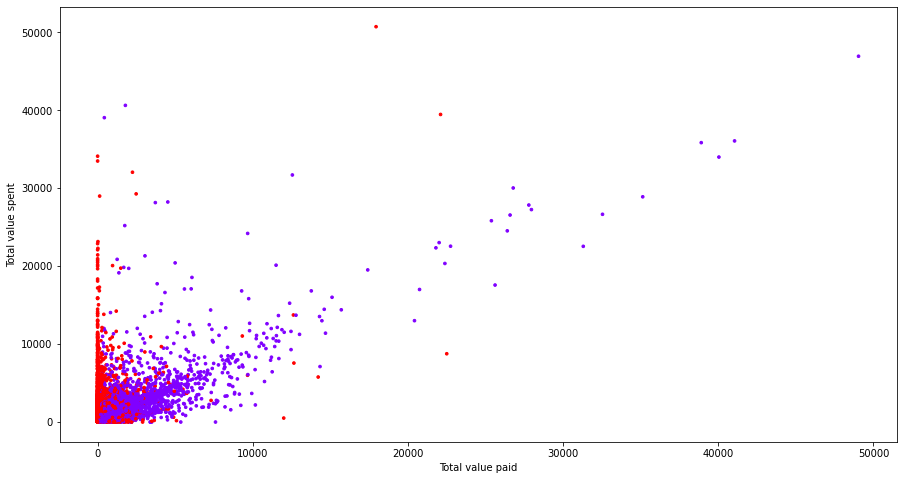

In [22]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(15,8))
plt.scatter(original_df['PURCHASES'], original_df['PAYMENTS'], c=pred_labels, s=7, cmap='rainbow')
plt.xlabel('Total value paid')
plt.ylabel('Total value spent')

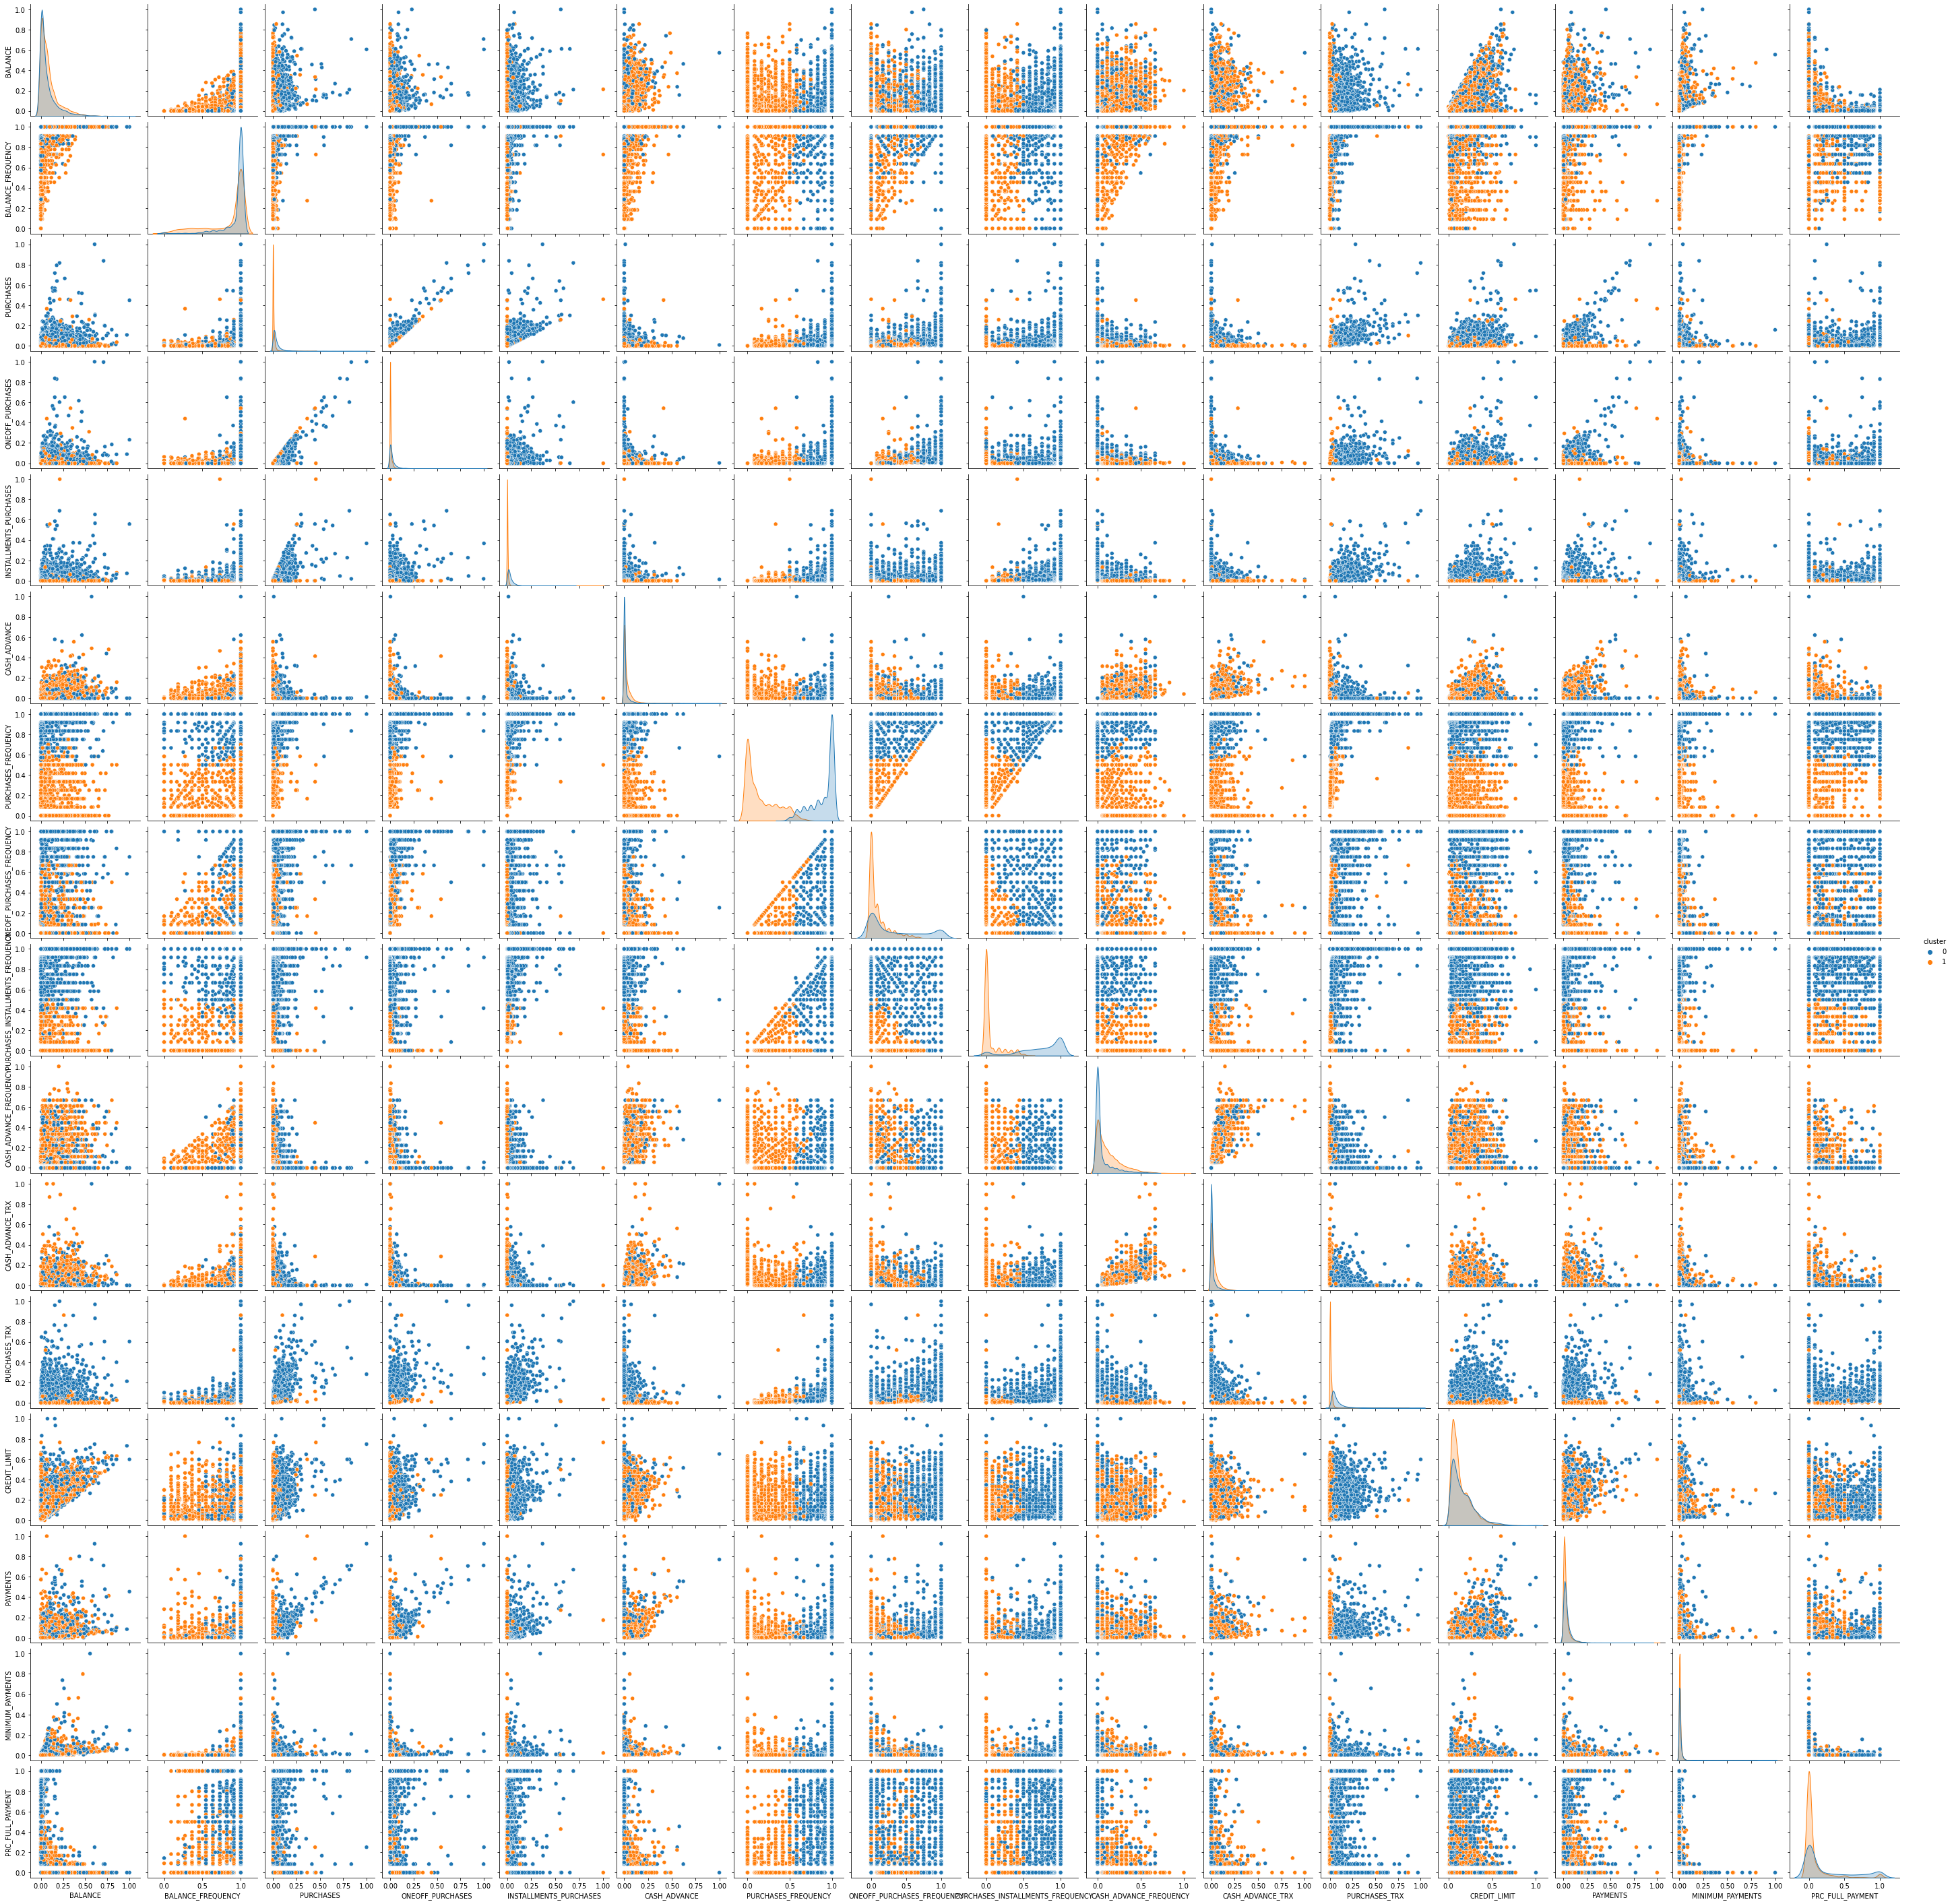

In [23]:
import seaborn as sns

df['cluster'] = pred_labels
sns.pairplot(df[0:], hue='cluster')

This is cool and all, but it's too overwhelming. There are other ways to interpret our data and find meaning in it, like using statistics.

In [24]:
df.groupby('cluster').describe()

BALANCE                                                         \
          count      mean       std  min       25%       50%       75%   
cluster                                                                  
0        4037.0  0.073746  0.110819  0.0  0.005047  0.028169  0.093488   
1        4913.0  0.089063  0.107568  0.0  0.010282  0.056412  0.119297   

                  BALANCE_FREQUENCY            ... MINIMUM_PAYMENTS            \
              max             count      mean  ...              75%       max   
cluster                                        ...                              
0        1.000000            4037.0  0.936241  ...         0.010185  1.000000   
1        0.856208            4913.0  0.828815  ...         0.010424  0.798778   

        PRC_FULL_PAYMENT                                               
                   count      mean       std  min  25%  50%  75%  max  
cluster                                                                
0                 4037.0  0.255366  0.354936  0.0  0.0  0.0  0.5  1.0  
1                 4913.0  0.070188  0.192063  0.0  0.0  0.0  0.0  1.0  

[2 rows x 128 columns]

A strategy we can use is to find attributes that have very low variance between the clusters and discard them. A way to do this is to find the clusters' centers and see how much it changes for each attibute. For example, if the centers of the clusters 0 and 1 are very close to one another in attribute A, but relatively distant in attribute B, this tells us that attribute A doesn't give us any importat information.

In [25]:
centroids = kmeans.cluster_centers_
centroids

array([[0.07373725, 0.93625719, 0.03732825, 0.02453026, 0.03693575,
        0.01200776, 0.89267051, 0.33598414, 0.72769302, 0.05174284,
        0.01583332, 0.08045149, 0.16309517, 0.0406127 , 0.0114252 ,
        0.25532293],
       [0.08907361, 0.82877982, 0.00658777, 0.00631699, 0.00292488,
        0.02796664, 0.15961602, 0.0926898 , 0.06581632, 0.12162516,
        0.03511063, 0.00873019, 0.13630146, 0.02887333, 0.01075585,
        0.07018569]])

In [26]:
n_att = centroids.shape[1] # Get the number of attributes
useful_features = []
print('VARIANCES:\n')
for i in range(n_att): # [0, 1, ..., 14, 15]
    print('{} -> {:.3f}'.format(df.columns.values[i], centroids[:, i].var()))
    if(centroids[:, i].var() >= 0.001):
        useful_features.append(df.columns.values[i])

VARIANCES:

BALANCE -> 0.000
BALANCE_FREQUENCY -> 0.003
PURCHASES -> 0.000
ONEOFF_PURCHASES -> 0.000
INSTALLMENTS_PURCHASES -> 0.000
CASH_ADVANCE -> 0.000
PURCHASES_FREQUENCY -> 0.134
ONEOFF_PURCHASES_FREQUENCY -> 0.015
PURCHASES_INSTALLMENTS_FREQUENCY -> 0.110
CASH_ADVANCE_FREQUENCY -> 0.001
CASH_ADVANCE_TRX -> 0.000
PURCHASES_TRX -> 0.001
CREDIT_LIMIT -> 0.000
PAYMENTS -> 0.000
MINIMUM_PAYMENTS -> 0.000
PRC_FULL_PAYMENT -> 0.009


Let's now select only the features with a significant enough variance (plus 'Balance', for arbitrary reasons), which are: 

BALANCE -> 0.0001

BALANCE_FREQUENCY -> 0.003

PURCHASES_FREQUENCY -> 0.134

ONEOFF_PURCHASES_FREQUENCY -> 0.015

PURCHASES_INSTALLMENTS_FREQUENCY -> 0.110

CASH_ADVANCE_FREQUENCY -> 0.001

PURCHASES_TRX -> 0.001

PRC_FULL_PAYMENT -> 0.009


Using these 7 attributes, we can make a more detailed analysis ignoring all the others

In [27]:
useful_features.insert(0, 'BALANCE')
description = df.groupby('cluster')[useful_features]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
description

BALANCE  BALANCE_FREQUENCY  PURCHASES_FREQUENCY  \
cluster                                                     
0        0.073746           0.936241             0.892768   
1        0.089063           0.828815             0.159685   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
cluster                                                                 
0                          0.336067                          0.727749   
1                          0.092671                          0.065905   

         CASH_ADVANCE_FREQUENCY  PURCHASES_TRX  PRC_FULL_PAYMENT  n_clients  
cluster                                                                      
0                      0.051756       0.080467          0.255366       4037  
1                      0.121600       0.008732          0.070188       4913

## Interpreting the results

To analyse them better, it might be best to use the non-normalized dataframe. So let's redo the previous steps, but with our original dataframe

In [28]:
original_df['cluster'] = pred_labels


description_not_norm = original_df.groupby('cluster')[useful_features]
n_clients = description_not_norm.size()
description_not_norm = description_not_norm.mean()
description_not_norm['n_clients'] = n_clients
description_not_norm

BALANCE  BALANCE_FREQUENCY  PURCHASES_FREQUENCY  \
cluster                                                        
0        1404.359342           0.936241             0.892768   
1        1696.041328           0.828815             0.159685   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
cluster                                                                 
0                          0.336067                          0.727749   
1                          0.092671                          0.065905   

         CASH_ADVANCE_FREQUENCY  PURCHASES_TRX  PRC_FULL_PAYMENT  n_clients  
cluster                                                                      
0                      0.077633      28.807283          0.255366       4037  
1                      0.182401       3.125992          0.070188       4913

### Summed up interpretation
CLUSTER 0 -> Low purchase and oneoff purchase frequencies; low frequency in purchase in installments; low purchase transactions; low percentage of full payments

CLUSTER 1 -> Very high frequency in purchases; higher oneoff purchases; high frequency in purchase in installments; low frequency in paying cash in advance; high purchase transactions; relatively high percentage of full payments

To sum up even more:

**CLUSTER 0** -> Clients who purchase very little

**CLUSTER 1** -> Clients who purchase a lot